In [1]:
# Import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salary-data/Salary_Data.csv


In [2]:
# Path
path = "/kaggle/input/salary-data/Salary_Data.csv"

In [3]:
# Loading the dataset
data = pd.read_csv(path)

# Head
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
# Basic stats (Numerical)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6702.0,33.620859,7.614633,21.0,28.0,32.0,38.0,62.0
Years of Experience,6701.0,8.094687,6.059003,0.0,3.0,7.0,12.0,34.0
Salary,6699.0,115326.964771,52786.183911,350.0,70000.0,115000.0,160000.0,250000.0


In [6]:
# Basic stats (Categorical)
data.describe(include="object").T

,count,unique,top,freq
Gender,6702,3,Male,3674
Education Level,6701,7,Bachelor's Degree,2267
Job Title,6702,193,Software Engineer,518


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

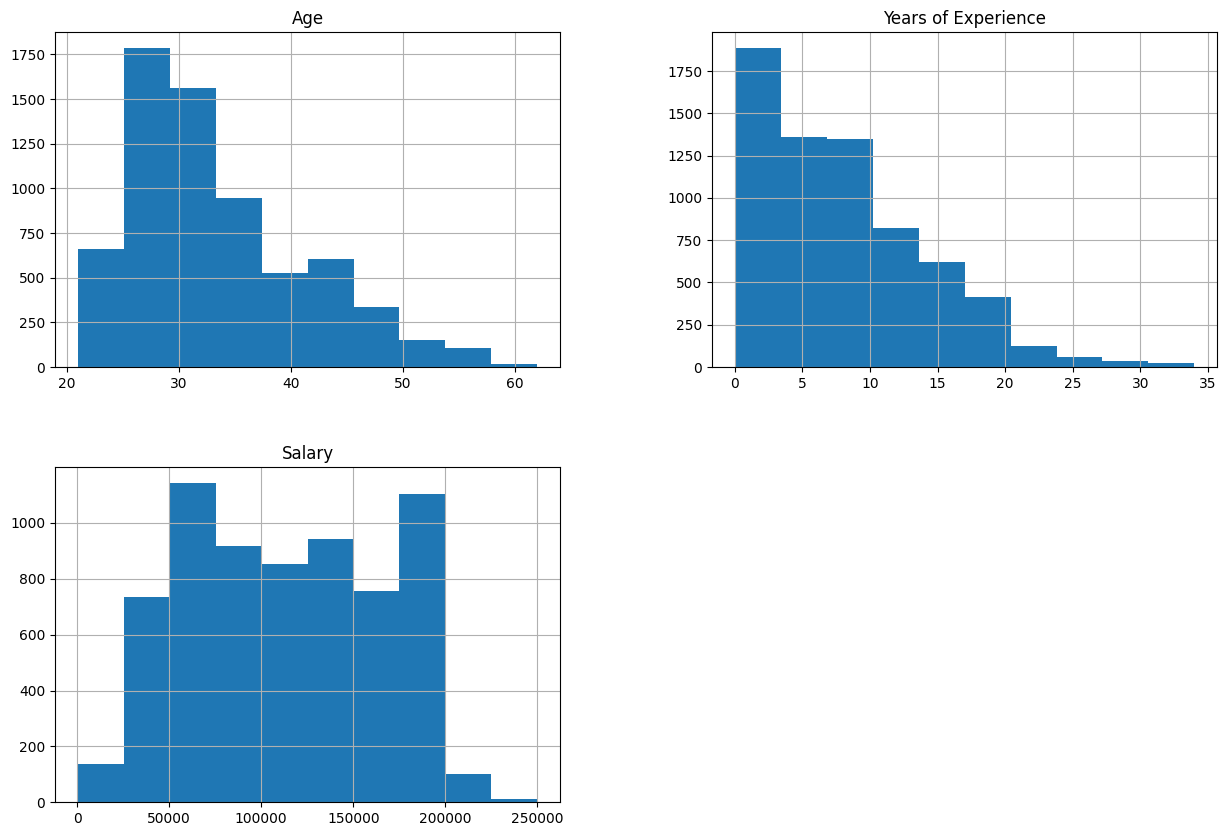

In [7]:
# Distribution of quantitive data
data.hist(figsize=(15,10))

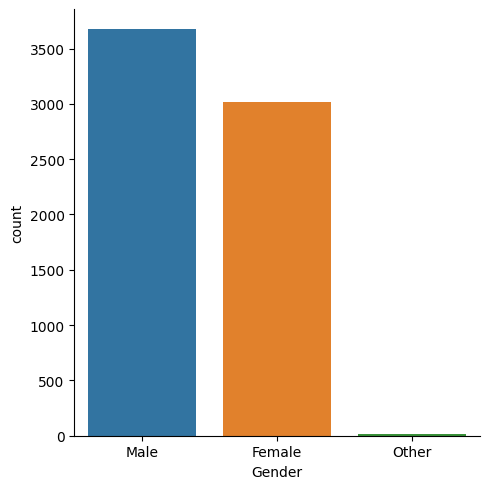

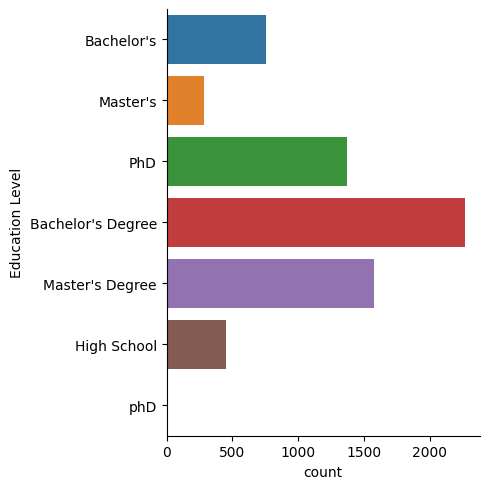

In [8]:
# distribution of qualitative data
seaborn.catplot(data=data,x = "Gender", kind="count")
seaborn.catplot(data=data,y = "Education Level", kind="count")

In [9]:
# Unique Values in Education Level column
data["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [10]:
# Sum of missing/NAN values
data.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [11]:
# Dropping rows with missing/NAN values
data = data.dropna()

# Recheck
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### **Synopsis**: The higher the experience, the better the pay gets with respect to the field/job title. The line graph below doesn't take job/field into account.

<Axes: xlabel='Years of Experience', ylabel='Salary'>

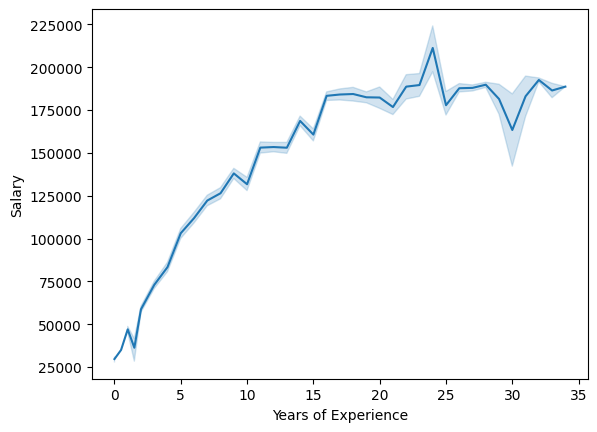

In [12]:
seaborn.lineplot(data = data,x = "Years of Experience",y = "Salary")

# Selecting Rows with 'Software Engineer' as title

In [13]:
# Filtering Data
swedata =  data.loc[data["Job Title"] == 'Software Engineer']

# Peeking in swedata
swedata.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
376,28.0,Female,Bachelor's,Software Engineer,3.0,125000.0
380,29.0,Female,Bachelor's,Software Engineer,4.0,140000.0
384,31.0,Female,Bachelor's,Software Engineer,6.0,155000.0
388,29.0,Female,Bachelor's,Software Engineer,4.0,140000.0


In [14]:
# Shape of the new dataframe
swedata.shape

(518, 6)

In [15]:
# Basic stats (Numerical)
swedata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,518.0,28.318533,2.617617,22.0,27.0,28.0,30.0,42.0
Years of Experience,518.0,4.449807,2.219221,1.0,3.0,4.0,5.0,13.0
Salary,518.0,113243.243243,48031.287179,50000.0,70000.0,90000.0,160000.0,197000.0


In [16]:
# Basic stats (Categorical)
swedata.describe(include = "object").T

,count,unique,top,freq
Gender,518,2,Male,325
Education Level,518,4,Bachelor's Degree,251
Job Title,518,1,Software Engineer,518


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

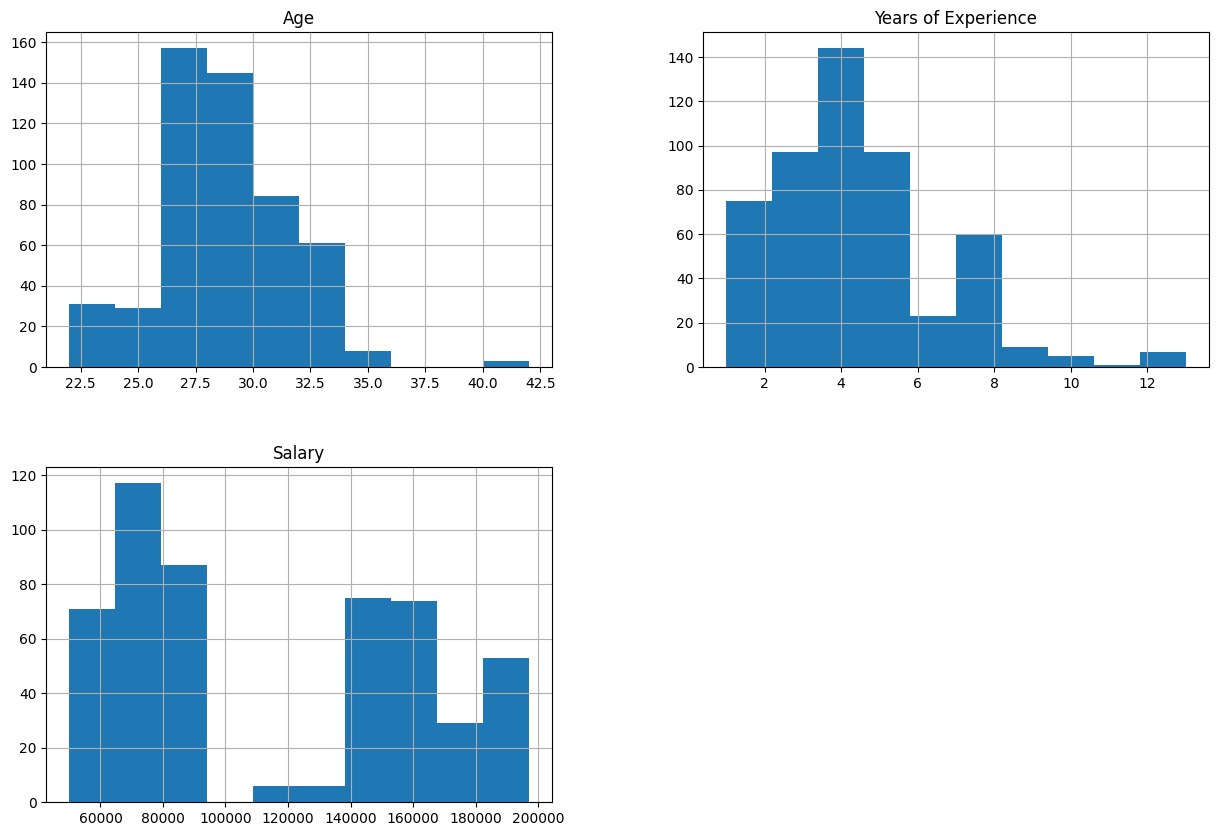

In [17]:
# Distribution
swedata.hist(figsize=(15,10))

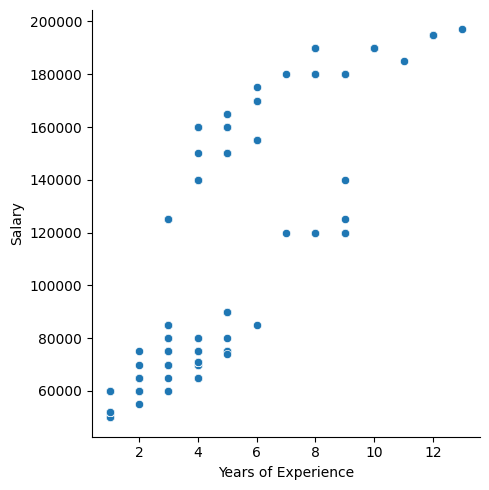

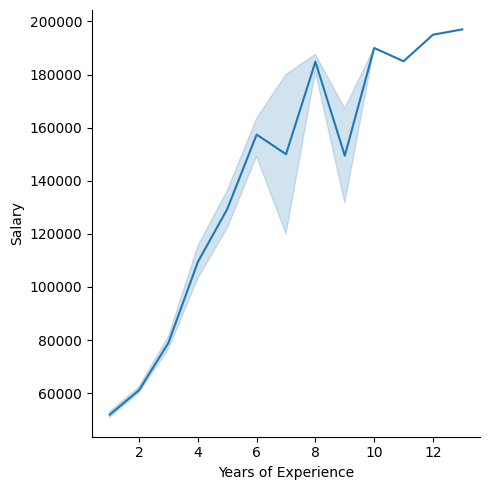

In [18]:
# Experience (x) vs Salary (y) plot
seaborn.relplot(swedata, x = 'Years of Experience', y = 'Salary')
seaborn.relplot(swedata, x = 'Years of Experience', y = 'Salary', kind = 'line')

<Axes: xlabel='Years of Experience', ylabel='Salary'>

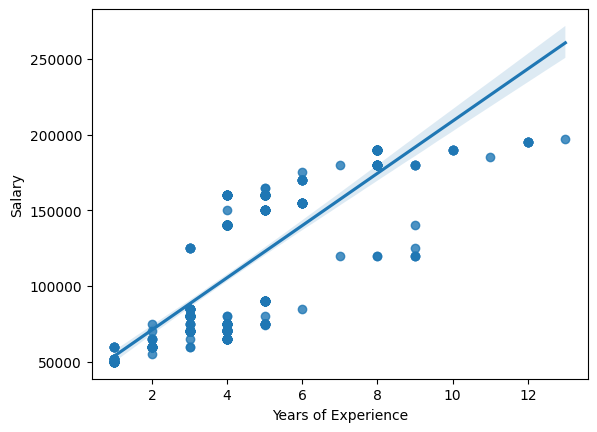

In [19]:
# Regression Plot
seaborn.regplot(swedata, x = 'Years of Experience', y = 'Salary')

# Simple Regression

In [20]:
# Splitting the data for model training
# features = swedata.drop(['Salary'], axis=1).values
features = swedata[['Years of Experience']]
label = swedata['Salary']
Ftrain, Ftest, Ltrain, Ltest = train_test_split(features, label, test_size=0.2)

In [21]:
# Training the model
model = LinearRegression()

# Fitting the data
model.fit(Ftrain, Ltrain)

LinearRegression()

In [22]:
# Evaluation 
model.score(Ftest, Ltest)

0.6230674047625955

# Multiple Regression